# PREDICTING A CONTINUOUS TARGET VARIABLE (HDL) FROM CONTINUOUS FEATURE VARIABLES (BLOOD VALUES) IN MICE
## Multiple Regression vs TPOT Pipeline


### Import Packages and Read In Data

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from tpot import TPOTRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


C:\Users\alica\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# Read file
mouse_df= pd.read_csv("Mouse.csv")

### Explore Data

In [3]:
#Checking file
mouse_df.head()
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           40 non-null     int64  
 1   age [weeks]  40 non-null     int64  
 2   sex          40 non-null     object 
 3   ALT          40 non-null     int64  
 4   AST          40 non-null     int64  
 5   GLDH         38 non-null     float64
 6   AP           38 non-null     float64
 7   GGT          40 non-null     int64  
 8   CHE          38 non-null     float64
 9   LIP          40 non-null     int64  
 10  LDH          38 non-null     float64
 11  PROT         40 non-null     int64  
 12  ALB          40 non-null     int64  
 13  CREAT        40 non-null     float64
 14  UREA NIT     38 non-null     float64
 15  GLUC         37 non-null     float64
 16  CHOL         40 non-null     object 
 17  TRI          40 non-null     int64  
 18  HDL          40 non-null     int64  
 19  CK        

In [4]:
#Remove ID column
mouse_df.drop("ID",axis=1,inplace=True)

In [5]:
# Describing variables
mouse_df.describe()

,age [weeks],ALT,AST,GLDH,AP,GGT,CHE,LIP,LDH,PROT,ALB,CREAT,UREA NIT,GLUC,TRI,HDL,CK,FT3,FT4
count,40.000000,40.000000,40.000000,38.000000,38.000000,40.000000,38.000000,40.000000,38.000000,40.000000,40.000000,40.00000,38.000000,37.000000,40.000000,40.000000,26.000000,40.000000,40.000000
mean,7.350000,30.275000,53.550000,12.092105,216.526316,7.350000,4.760526,172.900000,188.131579,43.275000,13.100000,0.23750,22.500000,366.594595,93.950000,62.425000,370.076923,4.590000,21.830000
std,0.483046,13.272272,19.522439,7.679083,32.544138,0.735544,0.680834,81.771037,39.955496,1.535687,1.104768,0.04465,2.816457,64.613578,28.835475,10.345041,144.129642,0.585202,2.756363
min,7.000000,17.000000,36.000000,5.000000,132.000000,6.000000,3.600000,122.000000,137.000000,40.000000,11.000000,0.14000,16.000000,196.000000,52.000000,45.000000,166.000000,3.500000,17.000000
25%,7.000000,22.000000,41.750000,7.450000,200.000000,7.000000,4.100000,141.000000,159.250000,42.000000,12.000000,0.20000,21.000000,314.000000,73.250000,55.000000,275.000000,4.100000,20.175000
50%,7.000000,27.000000,49.500000,10.100000,213.500000,7.000000,4.650000,159.500000,186.500000,43.000000,13.000000,0.23000,23.000000,378.000000,90.000000,59.000000,321.500000,4.650000,21.500000
75%,8.000000,31.250000,58.000000,12.875000,239.750000,8.000000,5.200000,173.000000,206.750000,44.000000,14.000000,0.27000,25.000000,420.000000,109.250000,70.250000,463.250000,5.000000,23.425000
max,8.000000,87.000000,129.000000,46.100000,280.000000,9.000000,6.100000,651.000000,361.000000,46.000000,15.000000,0.35000,27.000000,476.000000,170.000000,85.000000,743.000000,5.800000,31.300000


### Divide Data Into Features and Target

In [6]:
# Divide data as features and target
X = mouse_df.drop('HDL',axis=1)
y = mouse_df.HDL

#Check that target dropped from features
X.head()

,age [weeks],sex,ALT,AST,GLDH,AP,GGT,CHE,LIP,LDH,PROT,ALB,CREAT,UREA NIT,GLUC,CHOL,TRI,CK,FT3,FT4
0,8,f,27,102,7.3,227.0,8,6.1,171,251.0,44,14,0.30,24.0,297.0,58,54,NaN,3.5,20.2
1,8,f,20,44,6.8,204.0,7,5.3,132,159.0,42,14,0.25,25.0,367.0,62,60,272.0,3.8,23.1
2,8,f,20,42,5.9,203.0,7,5.3,127,169.0,42,14,0.30,21.0,423.0,55,89,365.0,3.7,17.0
3,8,f,20,40,5.0,209.0,9,5.1,138,152.0,43,14,0.29,24.0,420.0,61,83,279.0,4.1,24.5
4,8,f,27,97,6.1,NaN,8,NaN,122,NaN,42,13,0.24,NaN,NaN,59,74,743.0,4.0,18.8


### Clean Data

In [7]:
#Replace missing values in features
#For columns with more than 50% NAN value: remove columns
#For columns with less than 50% NAN value:Replace with the median or mode of that column

for col in X.columns.values:
    
    if (pd.isna(X[col]).sum()) > 0: 
    
        if pd.isna(X[col]).sum() > (50/100 * len(X)): 
            print(col,"Removed") 
            X = X.drop([col], axis=1) 
        
        elif (X[col].dtype == 'object'):
            X[col] = X[col].fillna(X[col].mode()[0])        
        
        else:
            X[col] = X[col].fillna(X[col].median())
            
print(X.isna().sum())

age [weeks]    0
sex            0
ALT            0
AST            0
GLDH           0
AP             0
GGT            0
CHE            0
LIP            0
LDH            0
PROT           0
ALB            0
CREAT          0
UREA NIT       0
GLUC           0
CHOL           0
TRI            0
CK             0
FT3            0
FT4            0
dtype: int64


### EDA

In [8]:
#Check correlation between features and target
corr_values = X.corrwith(y)
print("Correlation with HDL")
print(abs(corr_values).sort_values(ascending=False))

Correlation with HDL
AP             0.661933
ALB            0.573671
GLDH           0.507800
PROT           0.507317
CHE            0.498390
TRI            0.487443
CREAT          0.475875
ALT            0.411655
UREA NIT       0.384651
FT4            0.304917
age [weeks]    0.256814
FT3            0.226468
LDH            0.150944
CK             0.144196
GGT            0.077335
LIP            0.069767
GLUC           0.057838
AST            0.000933
dtype: float64


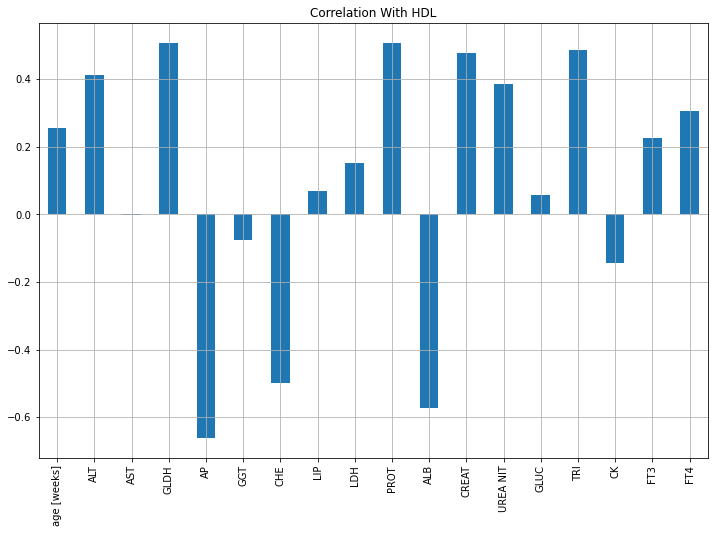

In [9]:
#Plot correlations between features and target

X.corrwith(y).plot(kind='bar',
                           grid=True, 
                           figsize=(12, 8),
                           title="Correlation With HDL");

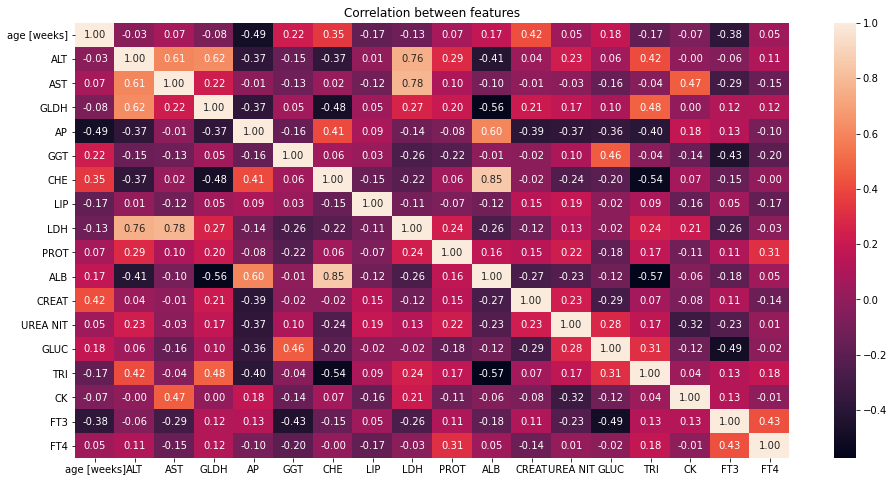

In [10]:
# Check for correlations between features
corr =X.corr()
fig, ax =plt.subplots(figsize =(16,8))
ax  = sns.heatmap(corr,annot =True,fmt = ".2f")
ax.set_title('Correlation between features');

In [11]:
# Converting object data to numeric
labelencoder = LabelEncoder()
for col_name in X.columns:
    if(X[col_name].dtype == 'object'):
        X[col_name] = labelencoder.fit_transform(X[col_name])
X.head(10)

,age [weeks],sex,ALT,AST,GLDH,AP,GGT,CHE,LIP,LDH,PROT,ALB,CREAT,UREA NIT,GLUC,CHOL,TRI,CK,FT3,FT4
0,8,0,27,102,7.3,227.0,8,6.10,171,251.0,44,14,0.30,24.0,297.0,5,54,321.5,3.5,20.2
1,8,0,20,44,6.8,204.0,7,5.30,132,159.0,42,14,0.25,25.0,367.0,9,60,272.0,3.8,23.1
2,8,0,20,42,5.9,203.0,7,5.30,127,169.0,42,14,0.30,21.0,423.0,2,89,365.0,3.7,17.0
3,8,0,20,40,5.0,209.0,9,5.10,138,152.0,43,14,0.29,24.0,420.0,8,83,279.0,4.1,24.5
4,8,0,27,97,6.1,213.5,8,4.65,122,186.5,42,13,0.24,23.0,378.0,6,74,743.0,4.0,18.8
5,8,0,17,40,5.4,216.0,7,5.00,177,159.0,43,14,0.23,19.0,344.0,12,62,389.0,5.2,23.5
6,8,0,35,53,11.6,209.0,8,5.90,159,149.0,42,14,0.25,25.0,363.0,3,52,260.0,4.4,19.6
7,8,0,25,60,6.3,200.0,8,5.50,143,188.0,41,13,0.25,19.0,392.0,3,77,434.0,4.2,18.0
8,8,0,24,38,6.2,213.5,8,4.65,154,186.5,44,14,0.22,23.0,378.0,1,74,172.0,3.6,19.3
9,8,0,30,49,9.7,211.0,8,6.10,142,175.0,46,15,0.23,20.0,421.0,7,105,290.0,4.0,22.0


### Split and Fit a Linear Regression Model

In [12]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

# Instantiate model
model = LinearRegression()

#Fit model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#Print model score
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)

#Print model attributes- intercept and coefficients
print('Intercept:', model.intercept_)
print(pd.DataFrame(model.coef_, X.columns, columns = ['Coeff']))

Coefficient of determination: 0.38201869659054477
Intercept: -76.84470079647008
                 Coeff
age [weeks]   7.044792
sex          10.594723
ALT           0.096611
AST          -0.016350
GLDH         -0.069896
AP            0.000118
GGT          -0.070671
CHE           2.946742
LIP          -0.073936
LDH          -0.043396
PROT          3.052693
ALB          -4.107404
CREAT        16.089684
UREA NIT      0.285541
GLUC         -0.015704
CHOL          0.202492
TRI           0.039893
CK            0.011907
FT3           1.121393
FT4          -0.403904


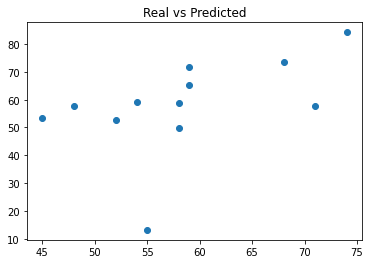

In [14]:
# Predict the targets of the test set
predictions = model.predict(X_test)

#Plot known vs predictions

plt.title('Real vs Predicted')
plt.scatter(y_test, predictions);


### Metrics of Performance of Regression Model

In [15]:
#Metrics for performance of regression model
#MAE
MAE = metrics.mean_absolute_error(y_test, predictions)
#MSE
MSE = metrics.mean_squared_error(y_test, predictions)
#RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("MAE= ",MAE, '\n',"MSE= ",MSE, '\n',"RMSE= ",RMSE)

MAE=  10.22743196845096 
 MSE=  210.18518867910458 
 RMSE=  14.497764954609542


### Fit and Metrics of TPOT Model

In [16]:
#TPOT regressor model
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=68)
tpot.fit(X_train, y_train)
print('Coefficient of determination:', r_sq)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: -32.148853611029615

Generation 2 - Current best internal CV score: -11.789816768090695

Generation 3 - Current best internal CV score: -11.789816768090695

Generation 4 - Current best internal CV score: -11.789816768090695

Generation 5 - Current best internal CV score: -11.789816768090695

Best pipeline: LassoLarsCV(PolynomialFeatures(KNeighborsRegressor(input_matrix, n_neighbors=12, p=1, weights=uniform), degree=2, include_bias=False, interaction_only=False), normalize=True)
Coefficient of determination: 0.38201869659054477
-35.970890307803224


In [17]:
#Metrics for performance of TPOT model
y_pred = tpot.predict(X_test)

print('MAE',mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('MSE',mean_squared_error(y_pred=y_pred, y_true=y_test))

MAE 5.119877594125111
MSE 35.970890307803224


### Best Model Summary For TPOT

In [18]:
# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Best pipeline steps:
1. StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=12, p=1))
2. PolynomialFeatures(include_bias=False)
3. LassoLarsCV()


### Summary Results:
Given that the data set used is rather small and somewhat scattered around the regression line, it is not surprising that neither model did an exceptional job at modeling the data. That being said, TPOT found that a polynomial regression would fit the data better than the linear multiple regression. As seen above, TPOT's pipeline gave a mean squared error of 35.97, while the linear regression model gave a mean squared error of 210.19. 